# Вариант 21

## Задание 1

### Исходные данные:

- $X_1 \sim \mathcal{N} (\mu_1, \sigma_1^2)$, где $\mu_1=2, \sigma_1^2=1$

- $X_2 \sim \mathcal{N} (\mu_2, \sigma_2^2)$, где $\mu_2=1, \sigma_1^2=1$

Неизвестны $\sigma_1^2 = \sigma_2^2$. Требуется построить доверительный интервал уровня $1−α$ для $τ= \mu_1 − \mu_2$

### Функция

$T = \sqrt{\frac{n_1 n_2 (n_1 + n_2 - 2)}{n_1 + n_2}} \cdot \frac{\overline{X_1} - \overline{X_2} - \tau}{\sqrt{n_1 S_*^2(X_1) + n_2 S_*^2(X_2)}}$, где $(S_*^2(X_i) = \frac{1}{n_i} \sum_{j=1}^{n_i} (X_{ij} - \overline{X_i})^2)$ — смещённая выборочная дисперсия.

### Построение доверительного интервала
1. Вычислим выборочные средние: $\overline{X_1} = \frac{1}{n_1} \sum_{j=1}^{n_1} X_{1j}$, $\quad \overline{X_2} = \frac{1}{n_2} \sum_{j=1}^{n_2} X_{2j}$.
2. Вычислим смещенные дисперсии: $S_*^2(X_1) = \frac{1}{n_1} \sum_{j=1}^{n_1} (X_{1j} - \overline{X_1})^2$,  $\quad S_*^2(X_2) = \frac{1}{n_2} \sum_{j=1}^{n_2} (X_{2j} - \overline{X_2})^2$.
3. Вычислим объединенную дисперсию: $S_p^2 = \frac{n_1 S_*^2(X_1) + n_2 S_*^2(X_2)}{n_1 + n_2 - 2}$.
4. Вычислим стандартную ошибку разности: $SE = \sqrt{\frac{S_p^2 (n_1 + n_2)}{n_1 n_2}}$
5. Вычислим доверительный интервал: $\text{ДИ} = \left( (\overline{X_1} - \overline{X_2}) \pm t_{\alpha/2, \nu} \cdot SE \right)$, где $\nu  = n_1 + n_2 - 2$ - степени свободы 

Доля покрытий для n=25: 0.9410
Доля покрытий для n=10000: 0.9490


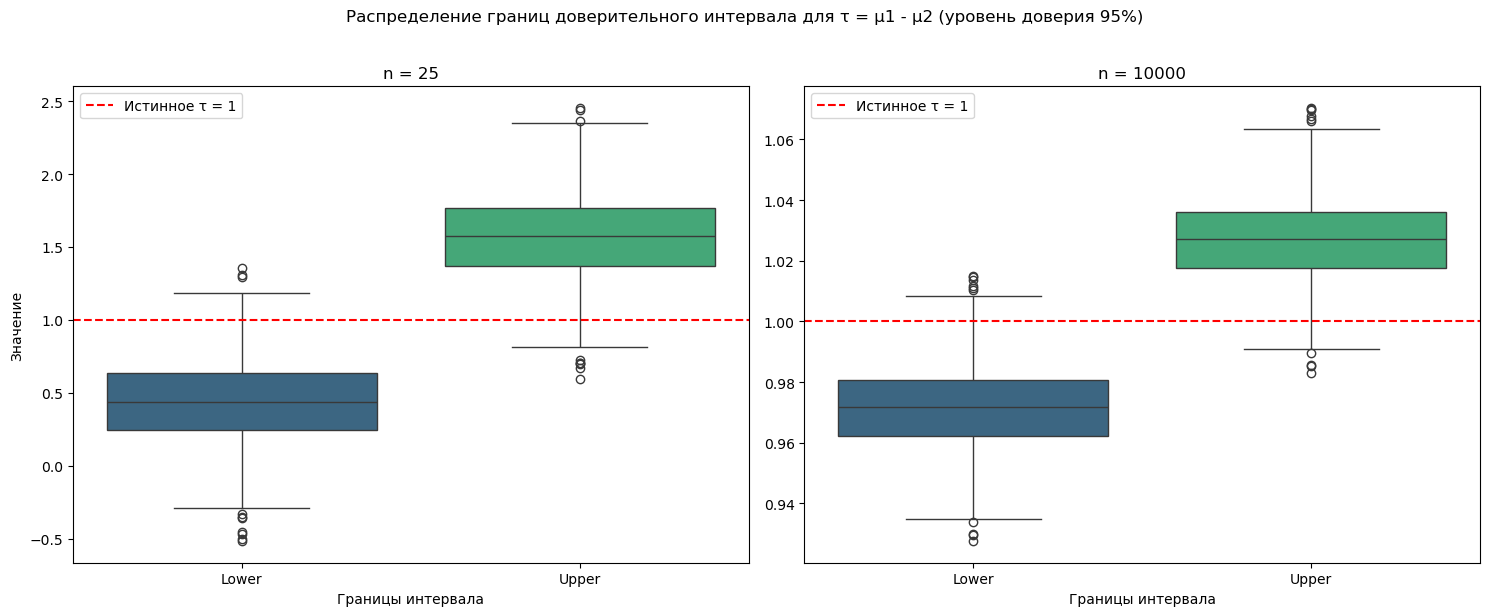

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import t

mu1, mu2 = 2, 1
sigma1, sigma2 = 1, 1
tau_real = mu1 - mu2 
alpha = 0.05
n_small = 25
n_large = 10000
experiments = 1000

def simulate_experiment(n):
    coverage = 0
    lowers = []
    uppers = []
    
    for _ in range(experiments):
        sample1 = np.random.normal(mu1, sigma1, n)
        sample2 = np.random.normal(mu2, sigma2, n)
        
        mean1, mean2 = np.mean(sample1), np.mean(sample2)
        var1_biased = np.var(sample1, ddof=0)
        var2_biased = np.var(sample2, ddof=0)
        
        sp2 = (n * var1_biased + n * var2_biased) / (2 * n - 2)
        se = np.sqrt(sp2 * (2 * n) / (n**2))
        
        df = 2 * n - 2
        t_crit = t.ppf(1 - alpha/2, df)
        
        diff = mean1 - mean2
        lower = diff - t_crit * se
        upper = diff + t_crit * se
        
        lowers.append(lower)
        uppers.append(upper)
        
        if lower <= tau_real <= upper:
            coverage += 1
    
    ci_df = pd.DataFrame({'Lower': lowers, 'Upper': uppers})
    coverage_prob = coverage / experiments
    return coverage_prob, ci_df

coverage_small, data_small = simulate_experiment(n_small)
coverage_large, data_large = simulate_experiment(n_large)

print(f"Доля покрытий для n={n_small}: {coverage_small:.4f}")
print(f"Доля покрытий для n={n_large}: {coverage_large:.4f}")

def draw_plot_1(data_small, data_large):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    fig.suptitle(f"Распределение границ доверительного интервала для τ = μ1 - μ2 (уровень доверия {1-alpha:.0%})", y=1.02)
    
    sns.boxplot(data=data_small, ax=ax1, palette="viridis")
    ax1.axhline(tau_real, color='red', linestyle='--', label=f'Истинное τ = {tau_real}')
    ax1.set_title(f"n = {n_small}")
    ax1.set_xlabel("Границы интервала")
    ax1.set_ylabel("Значение")
    ax1.legend()
    
    sns.boxplot(data=data_large, ax=ax2, palette="viridis")
    ax2.axhline(tau_real, color='red', linestyle='--', label=f'Истинное τ = {tau_real}')
    ax2.set_title(f"n = {n_large}")
    ax2.set_xlabel("Границы интервала")
    ax2.legend()
    
    plt.tight_layout()
    plt.show()

draw_plot_1(data_small, data_large)

### Как изменился результат?
- С ростом объема выборки покрытие приблизилось к номинальному уровню 95%
- Изменилась ширина доверительных интервалов. При n = 25 интервалы широкие, а при n = 10000 интервалы узкие, тут надо обратить внимания на шкалы слева от box-plot. 

### Как это объяснить?
- При больших n оценки стремяться к теоритическому значению (закон больших чисел)
- При n -> +inf t-распределение сходится к нормальному

### Что изменяется при росте объема выборок?
- Распределение выборочного среднего стремится к нормальному (Центральная предельная теорема)
- Доля интервалов, содержащий истинный параметр, приближается к номинальному уровню (95%)

## Задание 2

Экспоненциальное распределение Exp(λ) имеет плотность вероятности: $f(x) = \lambda e^{-\lambda x}, \quad x \geq 0$, где 
- $( \lambda > 0 )$ — параметр интенсивности,
- Математическое ожидание: $(\mathbb{E}[X] = \frac{1}{\lambda} )$,
- Медиана (m):  $m = \frac{\ln 2}{\lambda}$, При $( \lambda = 1 )$, медиана равна $( m = \ln 2 \approx 0.6931 )$.

По центральной предельной теореме выборочная медиана $\hat{m}$ асимптотически нормальна:
$\hat{m} \sim \mathcal{N}\left(m, \, \frac{1}{4n \cdot [f(m)]^2}\right)$, где:
- f(m)  — значение плотности распределения в точке медианы,
- n  — объем выборки.

### Вычисление f(m):
Для $Exp(\lambda)$: $f(m) = \lambda e^{-\lambda m} = \lambda e^{-\lambda \cdot \frac{\ln 2}{\lambda}} = \lambda \cdot e^{-\ln 2} = \frac{\lambda}{2}$.
При $( \lambda = 1 )$: $f(m) = \frac{1}{2}$
### Асимптотическая дисперсия:
$\sigma^2 = \frac{1}{4n \cdot \left(\frac{1}{2}\right)^2} = \frac{1}{n}.$
### Стандартная ошибка:
$SE = \sqrt{\sigma^2} = \frac{1}{\sqrt{n}}$.

### Доверительный интервал уровня $1 - \alpha$
Используя асимптотическую нормальность $( \hat{m})$, доверительный интервал:
$\hat{m} \pm z_{\alpha/2} \cdot \frac{1}{\sqrt{n}}$
где $( z_{\alpha/2} )$ — квантиль стандартного нормального распределения.  
Для $( \alpha = 0.05 )$: $z_{0.025} \approx 1.96$

[n=25] Эмпирическое покрытие: 0.936
[n=10000] Эмпирическое покрытие: 0.942



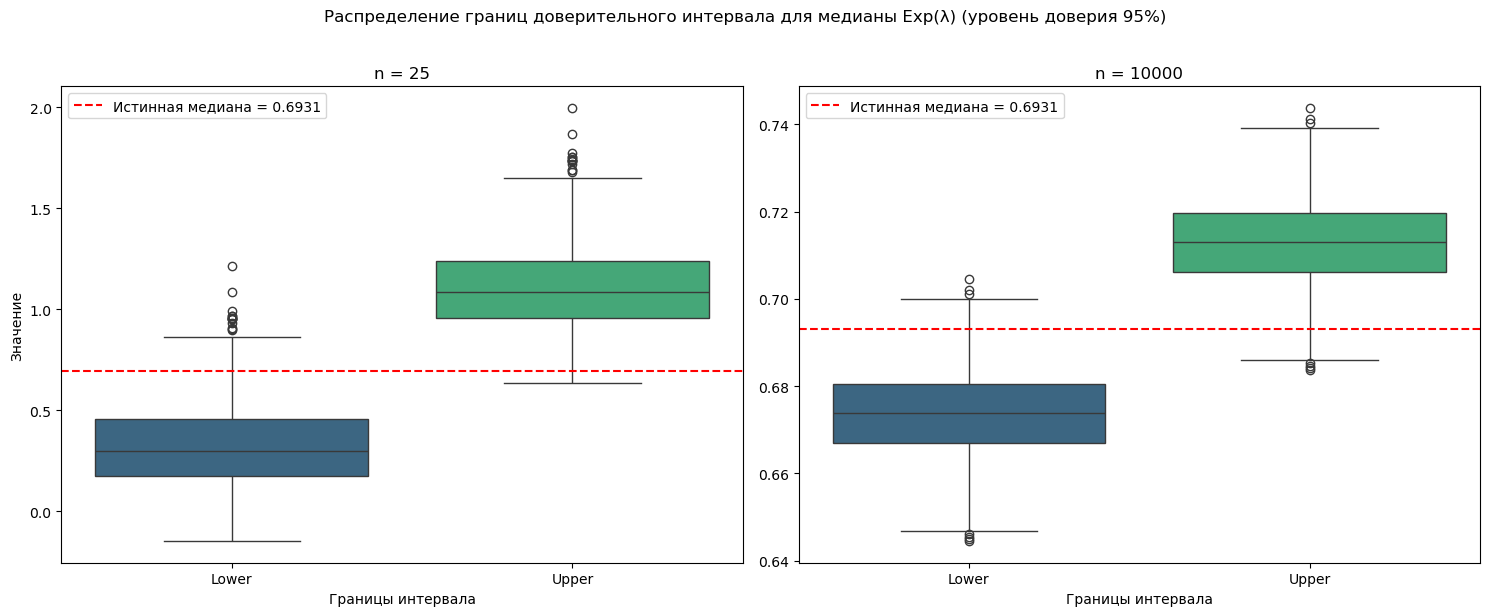

In [30]:
lambda_true = 1
median_true = np.log(2)  
alpha = 0.05
n_small = 25
n_large = 10000
experiments = 1000

def simulate_experiment(n):
    coverage = 0
    lowers = []
    uppers = []
    
    for _ in range(experiments):
        sample = np.random.exponential(scale=1/lambda_true, size=n)
        sample_median = np.median(sample)
        se = 1 / np.sqrt(n)
        
        z_crit = 1.96 
        lower = sample_median - z_crit * se
        upper = sample_median + z_crit * se
        
        lowers.append(lower)
        uppers.append(upper)
        
        if lower <= median_true <= upper:
            coverage += 1
    
    ci_df = pd.DataFrame({'Lower': lowers, 'Upper': uppers})
    coverage_prob = coverage / experiments
    return coverage_prob, ci_df

coverage_small, data_small = simulate_experiment(n_small)
coverage_large, data_large = simulate_experiment(n_large)

print(f"[n={n_small}] Эмпирическое покрытие: {coverage_small:.3f}")
print(f"[n={n_large}] Эмпирическое покрытие: {coverage_large:.3f}\n")

def draw_boxplots(data_small, data_large):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    fig.suptitle(
        f"Распределение границ доверительного интервала для медианы Exp(λ) (уровень доверия {1-alpha:.0%})", 
        y=1.02
    )
    
    sns.boxplot(data=data_small, ax=ax1, palette="viridis")
    ax1.axhline(median_true, color='red', linestyle='--', label=f'Истинная медиана = {median_true:.4f}')
    ax1.set_title(f"n = {n_small}")
    ax1.set_xlabel("Границы интервала")
    ax1.set_ylabel("Значение")
    ax1.legend()

    sns.boxplot(data=data_large, ax=ax2, palette="viridis")
    ax2.axhline(median_true, color='red', linestyle='--', label=f'Истинная медиана = {median_true:.4f}')
    ax2.set_title(f"n = {n_large}")
    ax2.set_xlabel("Границы интервала")
    ax2.legend()
    
    plt.tight_layout()
    plt.show()

draw_boxplots(data_small, data_large)

### Как изменился результат?
- С ростом объема выборки покрытие приблизилось к номинальному уровню 95%
- Изменилась ширина доверительных интервалов. При n = 25 интервалы широкие, а при n = 10000 интервалы узкие, тут надо обратить внимания на шкалы слева от box-plot. 

### Как это объяснить?
- При больших n оценки стремяться к теоритическому значению (закон больших чисел)
- При n -> +inf t-распределение сходится к нормальному

### Что изменяется при росте объема выборок?
- Распределение выборочного среднего стремится к нормальному (Центральная предельная теорема)
- Доля интервалов, содержащий истинный параметр, приближается к номинальному уровню (95%)